# Base-DT
A baseline Decision Tree using entropy as decision criterion and using default values for the rest of the parameters.

In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

from utils import config, ProcessDataset, model_utils
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, cross_val_score

## Loading Latin and Greek train and val data.

The data consists of 1025 columns, 1024 columns for each pixel and 1 row specifying the character it represents.
+ Calling helper method to load the dataset of training and validating

In [2]:
Latin_X_Train, Latin_Y_Train, Latin_X_Val, Latin_Y_Val = ProcessDataset.get_Latin_Train_Val()
Greek_X_Train, Greek_Y_Train, Greek_X_Val, Greek_Y_Val = ProcessDataset.get_Greek_Train_Val()

## Training the base DT model

In [3]:
clf_latin = DecisionTreeClassifier(criterion="entropy")
clf_latin.fit(Latin_X_Train, Latin_Y_Train)

clf_greek = DecisionTreeClassifier(criterion="entropy")
clf_greek.fit(Greek_X_Train, Greek_Y_Train)

DecisionTreeClassifier(criterion='entropy')

## Validating the model with K-Fold Cross-validation

In [4]:
kfold = KFold(n_splits=10, random_state=100)

results_kfold = cross_val_score(clf_latin, Latin_X_Val, Latin_Y_Val, cv=kfold)
print("Accuracy of latin: %.2f%%" % (results_kfold.mean()*100.0)) 

results_kfold = cross_val_score(clf_greek, Greek_X_Val, Greek_Y_Val, cv=kfold)
print("Accuracy of greek: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy of latin: 28.57%
Accuracy of greek: 69.01%


## Test the models
### Load the test datasets

In [5]:
Latin_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_NOLABEL))
Latin_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.LATIN_TEST_LABEL))[:,1024]

Greek_X_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_NOLABEL))
Greek_Y_Test = np.array(ProcessDataset.get_DataFromCSV(config.GREEK_TEST_LABEL))[:,1024]

### Make prediction and export results to `csv` file

In [6]:
Latin_Y_Pred = clf_latin.predict(Latin_X_Test)
pd.DataFrame(Latin_Y_Pred).to_csv("./Output/BASE-DT-DS1.csv", header=None)

Greek_Y_Pred = clf_greek.predict(Greek_X_Test)
pd.DataFrame(Greek_Y_Pred).to_csv("./Output/BASE-DT-DS2.csv", header=None)

## Assert the acuracy of the models
### 1. Confusion Matrix

#### Latin Character Prediction Model:

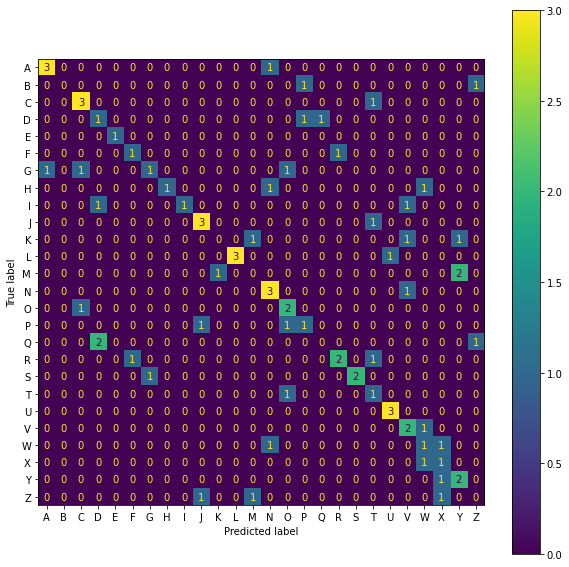

In [7]:
model_utils.show_confusion_matrix(clf_latin, Latin_X_Test, Latin_Y_Test, isGreekLetter=False)

#### Greek Character Prediction Model:

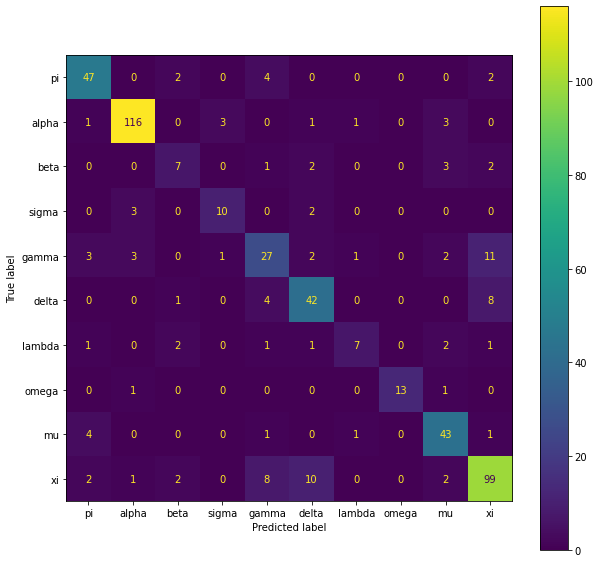

In [8]:
model_utils.show_confusion_matrix(clf_greek, Greek_X_Test, Greek_Y_Test, isGreekLetter=True)

### 2. Precision, recall, and f1-measure for each class

#### Latin Character Prediciton Model:

In [9]:
model_utils.calculate_PRF(Latin_Y_Test, Latin_Y_Pred)

,precision,recall,f1
0,0.750000,0.750000,0.750000
1,0.000000,0.000000,0.000000
2,0.600000,0.750000,0.666667
3,0.250000,0.333333,0.285714
4,1.000000,1.000000,1.000000
5,0.500000,0.500000,0.500000
6,0.500000,0.250000,0.333333
7,1.000000,0.333333,0.500000
8,1.000000,0.333333,0.500000
9,0.600000,0.750000,0.666667


#### Greek Character Prediction Model:

In [10]:
model_utils.calculate_PRF(Greek_Y_Test, Greek_Y_Pred)

,precision,recall,f1
0,0.810345,0.854545,0.831858
1,0.935484,0.928000,0.931727
2,0.500000,0.466667,0.482759
3,0.714286,0.666667,0.689655
4,0.586957,0.540000,0.562500
5,0.700000,0.763636,0.730435
6,0.700000,0.466667,0.560000
7,1.000000,0.866667,0.928571
8,0.767857,0.860000,0.811321
9,0.798387,0.798387,0.798387


### 3. Accuracy, macro-average f1 and weighted-average f1 of the model

#### Base-DT model on DS1 - Latin data set

In [11]:
print("Accuracy of base decision tree model on DS1: " + str(accuracy_score(Latin_Y_Test, Latin_Y_Pred) * 100) + "%")
f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')
print("Macro-average f1 of base decision tree model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of base decision tree model on DS1: " + str(f1_score(Latin_Y_Test, Latin_Y_Pred, average='weighted')*100)+"%")


Accuracy of base decision tree model on DS1: 48.10126582278481%
Macro-average f1 of base decision tree model on DS1: 44.8992673992674%
Weighted-average f1 of base decision tree model on DS1: 45.94936708860759%


#### Base-DT model on DS2 - Greek data set

In [12]:
print("Accuracy of base decision tree model on DS2: " + str(accuracy_score(Greek_Y_Test, Greek_Y_Pred)*100)+"%")
f1_score(Latin_Y_Test, Latin_Y_Pred, average='macro')
print("Macro-average f1 of base decision tree model on DS2: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='macro')*100)+"%")
print("Weighted-average f1 of base decision tree model on DS2: " + str(f1_score(Greek_Y_Test, Greek_Y_Pred, average='weighted')*100)+"%")

Accuracy of base decision tree model on DS2: 79.1907514450867%
Macro-average f1 of base decision tree model on DS2: 73.27213170484916%
Weighted-average f1 of base decision tree model on DS2: 78.99765027892992%
